# Etapa de entrenamiento y testeo de un modelo de análisis de sentimiento

In [ ]:
# Librerias:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import nltk
import random
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from google.colab import drive
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [ ]:
# montamos GDrive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Cargando el dataset creado:
df = pd.read_csv('drive/MyDrive/NLP/df_preprocessed.csv')

In [ ]:
df.head()

,overall,reviewText
0,1.0,"['helicopter', 'stopped', 'working', 'ten', 'm..."
1,1.0,"['here', 'whats', 'good', 'product', 'got', 'c..."
2,1.0,"['daughter', 'three', 'barelt', 'fit', 'toy', ..."
3,1.0,"['small', 'long', 'lasting', 'play', 'child', ..."
4,1.0,"['waste', 'money', 'product', 'flimsy', 'doesn..."


In [ ]:
# Asignar clasificaciones de estrellas a etiquetas de sentimiento
etiqueta = {1: 0, 2: 0, 3: 1, 4: 1, 5: 1}
df['etiqueta'] = df['overall'].map(etiqueta)

X = df['reviewText']
y = df['etiqueta']

# Dividir los datos en entrenamiento y prueba

In [ ]:
# Dividir los datos en datos de entrenamiento y prueba 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer(min_df=25, max_df=0.95, ngram_range=(1,4), max_features=2500)
vectorizer.fit(X)
X_train_tf = vectorizer.transform(X_train)
# Tomando X como entrada y convirtiéndolo en matriz de características
X_train_tf = X_train_tf.todense()
X_test_tf = vectorizer.transform(X_test)
# Tomando X como entrada y convirtiéndolo en matriz de características
X_test_tf = X_test_tf.todense()

In [ ]:
X_train_tf = np.asarray(X_train_tf)
X_test_tf = np.asarray(X_test_tf)


# **Primer modelo:**
## LogisticRegression

In [ ]:
# Crear una instancia del modelo LogisticRegression
lr = LogisticRegression(random_state=42)

# Entrenar el modelo LogisticRegression en el conjunto de entrenamiento
lr.fit(X_train_tf, y_train)

# Usar el modelo LogisticRegression entrenado para predecir el conjunto de prueba
y_pred = lr.predict(X_test_tf)

# Evaluar el rendimiento del modelo LogisticRegression utilizando accuracy, precision, recall y F1-score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)



Accuracy: 0.814468085106383
Precision: 0.8210873146622735
Recall: 0.8833746898263027
F1-score: 0.8510928961748635


In [ ]:
# Predecir
def predict_review_sentiment(review_index, model):
    print('Actual sentiment: {}'.format(df.iloc[review_index]['overall']))
    r = df.iloc[review_index]['reviewText']
    print('Prediction: {}'.format(model.predict(vectorizer.transform([r]))))

# Elegir revisiones aleatorias para predecir su sentimiento
for i in random.sample(range(0, len(df)), 5):
    print('\nReview no. {}'.format(i))
    predict_review_sentiment(i, lr)  # lr es el modelo de regresión logística que ya has entrenado




Review no. 3493
Actual sentiment: 1.0
Prediction: [0]

Review no. 4377
Actual sentiment: 1.0
Prediction: [0]

Review no. 6789
Actual sentiment: 2.0
Prediction: [0]

Review no. 7117
Actual sentiment: 2.0
Prediction: [0]

Review no. 12888
Actual sentiment: 3.0
Prediction: [1]


# **Segundo modelo:**
##GradientBoostingClassifier

In [ ]:
# Crear una instancia del modelo GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)

# Entrenar el modelo GradientBoostingClassifier en el conjunto de entrenamiento
gbc.fit(X_train_tf, y_train)

# Usar el modelo GradientBoostingClassifier entrenado para predecir el conjunto de prueba
y_pred = gbc.predict(X_test_tf)

# Evaluar el rendimiento del modelo GradientBoostingClassifier utilizando accuracy, precision, recall y F1-score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)


Accuracy: 0.7640425531914894
Precision: 0.7479721900347625
Recall: 0.9152782701169798
F1-score: 0.823210585047027


In [ ]:
# Predecir
def predict_review_sentiment(review_index, model, vectorizer):
    print('Actual sentiment: {}'.format(df.iloc[review_index]['overall']))
    r = df.iloc[review_index]['reviewText']
    print('Prediction: {}'.format(model.predict(vectorizer.transform([r]))))

# Elegir revisiones aleatorias para predecir su sentimiento
for i in random.sample(range(0, len(df)), 5):
    print('\nReview no. {}'.format(i))
    predict_review_sentiment(i, gbc, vectorizer)  # gbc es el modelo de GradientBoostingClassifier que ya has entrenado



Review no. 12422
Actual sentiment: 3.0
Prediction: [1]

Review no. 11989
Actual sentiment: 3.0
Prediction: [1]

Review no. 23372
Actual sentiment: 5.0
Prediction: [1]

Review no. 3257
Actual sentiment: 1.0
Prediction: [0]

Review no. 14901
Actual sentiment: 4.0
Prediction: [1]


# **Modelos extra:**

##SVC

In [ ]:
# Crear una instancia del modelo SVM
svc = SVC(kernel='linear', C=1, random_state=42)

# Entrene el modelo SVM en el conjunto de entrenamiento
svc.fit(X_train_tf, y_train)

# Usar el modelo SVM entrenado para predecir el sentimiento del conjunto de prueba
y_pred = svc.predict(X_test_tf)

# Evaluar el rendimiento del modelo SVM utilizando accuracy, precision, recall y F1-score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)

Accuracy: 0.815531914893617
Precision: 0.8267558528428094
Recall: 0.8762850053172634
F1-score: 0.8508002065049044


In [ ]:
# Creación de una función para encontrar los mejores parámetros
def svc_tuning(X_train, y_train, X_test, y_test):
    # Establecer los parámetros para la búsqueda
    param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['poly', 'rbf', 'sigmoid', 'linear']}

    # Crear el clasificador SVM
    svc = SVC()

    # Crear el GridSearchCV
    grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Ajuste del GridSearchCV a los datos de entrenamiento
    grid_search.fit(X_train, y_train)

    # Usar el mejor modelo de la búsqueda para hacer predicciones sobre los datos de prueba
    y_pred = grid_search.predict(X_test)

    # Calcular el accuracy, precision, recall y F1-score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print('Best parameters:', grid_search.best_params_)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-score:', f1)

In [ ]:
svc_tuning(X_train_tf[0:2000], y_train[0:2000], X_test_tf, y_test)

Best parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Accuracy: 0.7589361702127659
Precision: 0.7649089767733835
Recall: 0.8638780574264445
F1-score: 0.811386715498585


In [ ]:
# Crear una instancia del modelo SVM con los mejores hiperparámetros
svc = SVC(kernel='rbf', C=10, gamma=1, random_state=42)

# Entrenar el modelo SVM en el conjunto de entrenamiento
svc.fit(X_train_tf, y_train)

# Usar el modelo SVM entrenado para predecir el sentimiento del conjunto de prueba
y_pred = svc.predict(X_test_tf)

# Evaluar el rendimiento del modelo SVM usando accuracy, precision, recall, and F1-score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)



Accuracy: 0.8161702127659575
Precision: 0.8302396220047249
Recall: 0.8720311946118398
F1-score: 0.8506224066390042


In [ ]:
# Prediccion
def predict_review_sentiment(review_index, model, vectorizer):
    print('Actual sentiment: {}'.format(df.iloc[review_index]['overall']))
    r = df.iloc[review_index]['reviewText']
    print('Prediction: {}'.format(model.predict(np.asarray(vectorizer.transform([r]).todense()))))  # convertir a np.array

# Elegir revisiones aleatorias para predecir su sentimiento
for i in random.sample(range(0, len(df)), 5):
    print('\nReview no. {}'.format(i))
    predict_review_sentiment(i, svc, vectorizer)  # svc es el modelo de SVC que ya has entrenado




Review no. 11100
Actual sentiment: 3.0
Prediction: [1]

Review no. 21016
Actual sentiment: 5.0
Prediction: [1]

Review no. 5283
Actual sentiment: 2.0
Prediction: [0]

Review no. 19191
Actual sentiment: 5.0
Prediction: [1]

Review no. 22926
Actual sentiment: 5.0
Prediction: [1]


## XGBoost

In [ ]:
# Definir el modelo XGBoost
xgb_model = XGBClassifier()

#Parametros
params = {
    "learning_rate": [0.1, 0.01, 0.001],
    "max_depth": [3, 5, 7],
    "subsample": [0.5, 0.8, 1.0],
    "colsample_bytree": [0.5, 0.8, 1.0],
    "gamma": [0.01, 0.1, 1.0]
}

# Se usa RandomizedSearchCV porque GridSearchCV tardaba una eternidad con el colab
grid_search = RandomizedSearchCV ( # usar grid_search =GridSearchCV  si es GridSearchCV
    estimator=xgb_model,
    param_distributions=params,  # Usar param_grid=params si es GridSearchCV
    cv=3,
    n_jobs=-1,
    verbose=3
)

# Ajustar la búsqueda de cuadrícula a los datos de entrenamiento
grid_search.fit(X_train_tf[:2000], y_train[:2000])

# Imprimir los mejores parámetros y la puntuación correspondiente
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'subsample': 1.0, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.01, 'colsample_bytree': 0.5}
Best score: 0.7260026143084614


In [ ]:
# Parametros para el modelo XGBoost
xgb_model = XGBClassifier(
    n_estimators=1000,
    max_depth=3,
    learning_rate=0.1,
    subsample=1,
    colsample_bytree=0.5,
    gamma = 0.01,
    random_state=42
)

# Entrenar modelo XGBoost
xgb_model.fit(X_train_tf, y_train)

# Evaluar modelo XGBoost
y_pred = xgb_model.predict(X_test_tf)
accuracy = accuracy_score(y_test, y_pred)



In [ ]:
# Evaluar el rendimiento del modelo XGBoost usando accuracy, precision, recall, and F1-score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)

Accuracy: 0.8080851063829787
Precision: 0.8102166181700614
Recall: 0.8883374689826302
F1-score: 0.847480554616165


In [ ]:
# Prediccion
def predict_review_sentiment(review_index, model, vectorizer):
    print('Actual sentiment: {}'.format(df.iloc[review_index]['overall']))
    r = df.iloc[review_index]['reviewText']
    print('Prediction: {}'.format(model.predict(np.asarray(vectorizer.transform([r]).todense()))))  # convertir a np.array

# Elegir revisiones aleatorias para predecir su sentimiento
for i in random.sample(range(0, len(df)), 5):
    print('\nReview no. {}'.format(i))
    predict_review_sentiment(i, xgb_model, vectorizer)  # xgb_model es el modelo de xgb que ya has entrenado



Review no. 4759
Actual sentiment: 2.0
Prediction: [0]

Review no. 4383
Actual sentiment: 1.0
Prediction: [0]

Review no. 12013
Actual sentiment: 3.0
Prediction: [1]

Review no. 11263
Actual sentiment: 3.0
Prediction: [1]

Review no. 12107
Actual sentiment: 3.0
Prediction: [1]


# **Modelos utilizando Deep learning**

In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade keras
!pip install --upgrade tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 87.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 94.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 46.5 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.

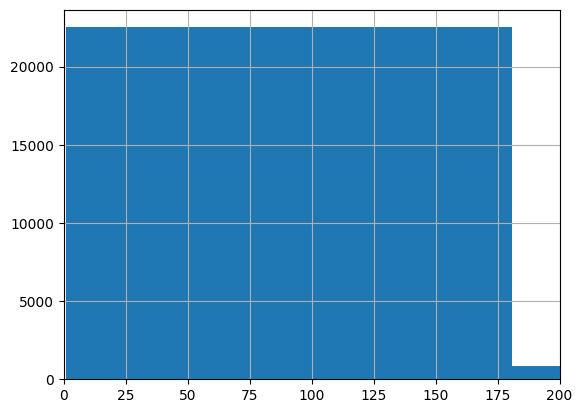

63489


In [ ]:
# Ver la distribución de las longitudes de las palabras
df['reviewText'].str.split().apply(len).hist() # Tamaño vocabulario
plt.xlim([0,200]) # La mayoria se encuentra entre 0 y 200
plt.show()

# Ver el número total de palabras únicas
print(len(pd.Series(' '.join(df['reviewText']).split()).value_counts()))

In [ ]:
 # Librerias de keras
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, GRU, SimpleRNN
from keras import regularizers
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import gensim
import multiprocessing as mp
from keras.datasets import imdb
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Tamaño del vocabulario
vocab_size = 63489
vocabulary_size = 63489

# Longitud máxima del texto
max_length = 175

# Instancia del Tokenizer
tokenizer = Tokenizer(num_words=vocab_size)

# Ajustar el tokenizer a tus datos
tokenizer.fit_on_texts(X_train)

# Convertir el texto a secuencias de tokens
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Asegurarse de que todas las secuencias tienen la misma longitud
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)


In [ ]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

**Modelo utilizando LSTM**

In [ ]:
embedding_size = 32
max_words = 175 # el mismo valor que usaste para max_len en pad_sequences

model_LSTM = Sequential()
model_LSTM.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model_LSTM.add(Dropout(0.5))  # Añade una capa de Dropout después de la capa de Embedding para mejorar overfitting

# Capa LSTM  de 50, si es mayor hay overfitting  
model_LSTM.add(LSTM(50, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001))) # Regularización Elastic Net L1+L2 para mejorar el overfitting
model_LSTM.add(Dropout(0.5))  # Añade una capa de Dropout después de la capa LSTM para mejorar overfiting
model_LSTM.add(Dense(1, activation='sigmoid'))

print(model_LSTM.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 175, 32)           2031648   
                                                                 
 dropout (Dropout)           (None, 175, 32)           0         
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2048299 (7.81 MB)
Trainable params: 2048299 (7.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# Compilar el modelo
model_LSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
batch_size = 64
num_epochs = 10

# Usar early_stopping para que se pare si val_loss se repite
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

# Ajustar el modelo
history = model_LSTM.fit(X_train_pad, y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_data=(X_test_pad, y_test), callbacks=[early_stopping])

Epoch 1/10
294/294 [==============================] - 125s 399ms/step - loss: 0.7261 - accuracy: 0.6785 - val_loss: 0.4934 - val_accuracy: 0.7904
Epoch 2/10
294/294 [==============================] - 67s 226ms/step - loss: 0.4410 - accuracy: 0.8195 - val_loss: 0.4763 - val_accuracy: 0.7974
Epoch 3/10
294/294 [==============================] - 43s 144ms/step - loss: 0.3655 - accuracy: 0.8615 - val_loss: 0.4590 - val_accuracy: 0.8060
Epoch 4/10
294/294 [==============================] - 28s 96ms/step - loss: 0.3109 - accuracy: 0.8832 - val_loss: 0.5229 - val_accuracy: 0.7974
Epoch 5/10
294/294 [==============================] - 29s 99ms/step - loss: 0.2702 - accuracy: 0.9033 - val_loss: 0.5070 - val_accuracy: 0.7889


147/147 [==============================] - 2s 12ms/step - loss: 0.5070 - accuracy: 0.7889
Loss: 0.5069781541824341
Accuracy: 0.788936197757721


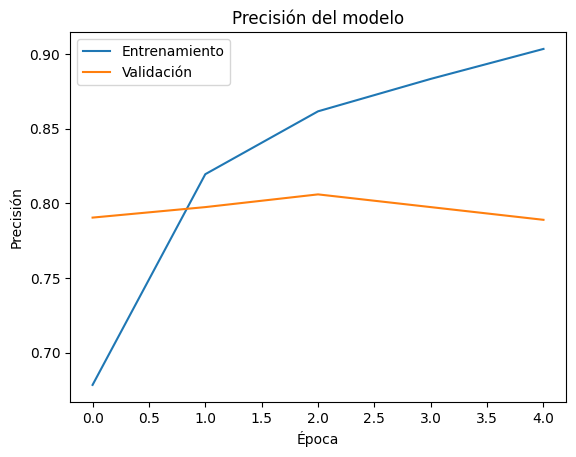

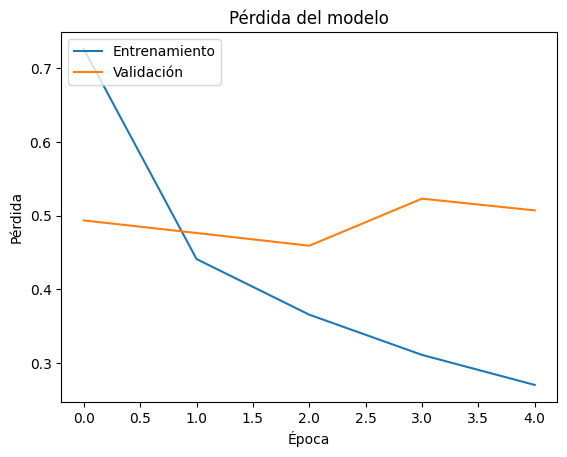

In [ ]:
# Evaluar el modelo
loss, accuracy = model_LSTM.evaluate(X_test_pad, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Graficar la precisión y la pérdida en el entrenamiento y la validación
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

In [ ]:
history.history

{'loss': [0.7260501980781555,
  0.44096872210502625,
  0.36548158526420593,
  0.3109329342842102,
  0.2701980769634247],
 'accuracy': [0.6784574389457703,
  0.819468080997467,
  0.8615425825119019,
  0.8832446932792664,
  0.9032979011535645],
 'val_loss': [0.49337050318717957,
  0.4763217866420746,
  0.4590417146682739,
  0.5228997468948364,
  0.5069780349731445],
 'val_accuracy': [0.7904255390167236,
  0.7974467873573303,
  0.8059574365615845,
  0.7974467873573303,
  0.788936197757721]}

**Modelo utilizando GRUV2**

In [ ]:
vocabulary_size = 63489
embedding_size = 32
max_words = 175 # El mismo valor que usaste para max_len en pad_sequences

model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(Dropout(0.5))  # Añade una capa de Dropout después de la capa de Embedding para mejorar overfiting

model.add(GRU(50, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001))) # Capa GRU de 50 por overfitting   # Regularización Elastic Net L1+L2
model.add(Dropout(0.5))  # Añade una capa de Dropout después de la capa GRU para mejorar overfiting
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 175, 32)           2031648   
                                                                 
 dropout_2 (Dropout)         (None, 175, 32)           0         
                                                                 
 gru (GRU)                   (None, 50)                12600     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2044299 (7.80 MB)
Trainable params: 2044299 (7.80 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
batch_size = 64
num_epochs = 10

# Usar early_stopping para que se pare si val_loss se repite
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

# Ajustar el modelo
history = model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_data=(X_test_pad, y_test), callbacks=[early_stopping])

Epoch 1/10
294/294 [==============================] - 104s 344ms/step - loss: 0.7308 - accuracy: 0.6577 - val_loss: 0.4798 - val_accuracy: 0.7830
Epoch 2/10
294/294 [==============================] - 64s 216ms/step - loss: 0.4441 - accuracy: 0.8131 - val_loss: 0.4383 - val_accuracy: 0.8072
Epoch 3/10
294/294 [==============================] - 42s 143ms/step - loss: 0.3583 - accuracy: 0.8588 - val_loss: 0.4492 - val_accuracy: 0.8064
Epoch 4/10
294/294 [==============================] - 28s 95ms/step - loss: 0.3086 - accuracy: 0.8823 - val_loss: 0.4827 - val_accuracy: 0.7791


147/147 [==============================] - 2s 14ms/step - loss: 0.4827 - accuracy: 0.7791
Loss: 0.48270291090011597
Accuracy: 0.7791489362716675


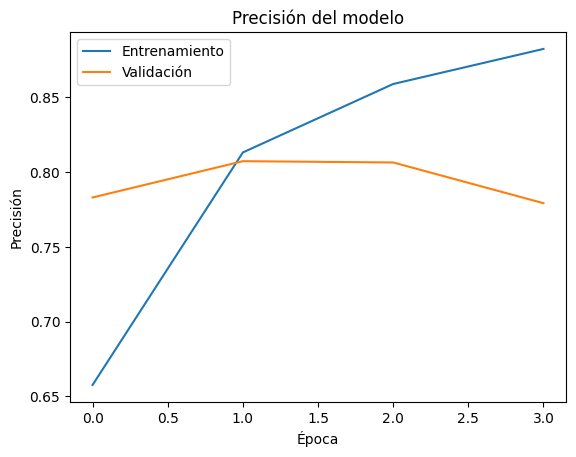

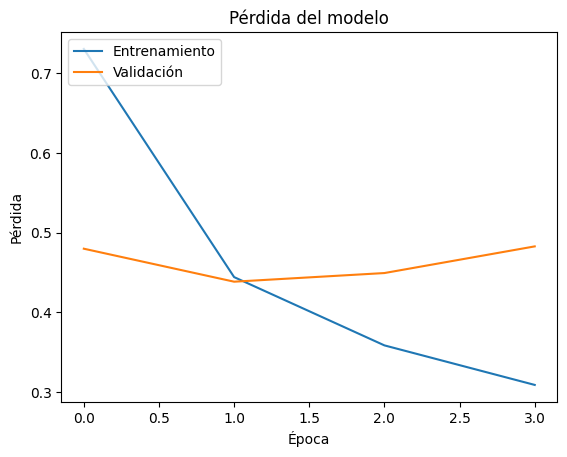

In [ ]:
# Evaluamos el modelo
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Graficamos la precisión y la pérdida en el entrenamiento y la validación
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

In [ ]:
history.history

{'loss': [0.7307964563369751,
  0.444111704826355,
  0.35832130908966064,
  0.3086490035057068],
 'accuracy': [0.6576595902442932,
  0.8130850791931152,
  0.8588297963142395,
  0.8822872042655945],
 'val_loss': [0.4797939956188202,
  0.4383433759212494,
  0.4492090940475464,
  0.48270314931869507],
 'val_accuracy': [0.7829787135124207,
  0.8072340488433838,
  0.806382954120636,
  0.7791489362716675]}

**Modelo utilizando RNN + word2vec Embedding**

In [ ]:
# Parámetros del WORD2VEC
W2V_SIZE = 300 # tamaño de vectores
W2V_WINDOW = 7 # número de palabras que va a mirar alrededor
# 32
W2V_EPOCH = 5 # número de epoca
W2V_MIN_COUNT = 2 #número mínimo de frecuencia

# KERAS
SEQUENCE_LENGTH = 175 # número de secuencias de keras (numero de palabras review)

In [ ]:
def generate_tokenizer(train_df):
  #generamos un identificador único para cada una de las palabras
  #creamos el vocabulario (tenemos palabra y número)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(train_df)
    vocab_size = len(tokenizer.word_index) + 1
    print(f"Total words: {vocab_size}")
    return tokenizer, vocab_size

In [ ]:
def generate_word2vec(train_df):
  #para cada review la dividimos en tokens (palabras )
  #para todos los documentos tiene todas las palabras generamos un identificados único para cada una de las palabras
  #generamos el modelo, utilizamos la librería gemsin con los parametros definidos previamente, vocabulario y luego entrenamiento
  #creamos representacion vecrtoriales (en arrays de 300 elementos)
    documents = [_text.split() for _text in train_df.review]
    w2v_model = gensim.models.word2vec.Word2Vec(
        vector_size=W2V_SIZE,
        window=W2V_WINDOW,
        min_count=W2V_MIN_COUNT,
        workers=mp.cpu_count(),
    )
    w2v_model.build_vocab(documents)

    words = w2v_model.wv.key_to_index.keys()
    vocab_size = len(words)
    print(f"Vocab size: {vocab_size}")
    w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

    return w2v_model

In [ ]:
# Generamos la capa de embeddings
# El modelo no tiene que hacer el fit de la capa de embeddings, se la damos dada

def generate_embedding(word2vec_model, vocab_size, tokenizer):
  # generamos un capa de embedding como en el ejemplo anterior con LSTM y GRU pero
  # en este caso lo hacemos por separado y guardamos el objeto
  # Generamos la matriz de embedding, inicializamos a 0 con el tamaño de  W2V y vocabulario
  # Para cada palabra del vocabulario generamos la representación vectorial de w2v
  # y se la asignamos a la matriz. De este modo, generamos la matrix de equivalencia
    embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
    for word, i in tokenizer.word_index.items():
        if word in word2vec_model.wv:
            embedding_matrix[i] = word2vec_model.wv[word]
    return Embedding(
        vocab_size,
        W2V_SIZE,
        weights=[embedding_matrix],
        input_length=SEQUENCE_LENGTH,
        # Con trainable le indicamos que no se modificar lo que ya viene dentro de esa capa
        trainable=False,
    )

    # Devuelve la capa de embedding

In [ ]:
#cargamos los datos con imdb. Tendremos el vocabularion con los índices
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocabulary_size)

In [ ]:
#convertimos a palabras. Una lista con cada review (un string único)
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}

X_train_words = []
for index, example in enumerate(X_train):
  words = " ".join([id2word.get(i, " ") for i in X_train[index]]).strip()
  X_train_words.append(words)

In [ ]:
X_test_words = []
for index, example in enumerate(X_test):
  words = " ".join([id2word.get(i, " ") for i in X_test[index]]).strip()
  X_test_words.append(words)

In [ ]:
X_train_words[10]

"the clear fact entertaining there life back br is safely show of performance stars br actors film him many should movie reasons to mikey reading blended are in of scenes jada carbon of safely out compared not boss yes to sentiment show its disappointed fact raw to it justice by br of where clear fact many your way jada with city nice are is along wrong not as it way she but this anything up haven't been by who of choices br of you to as this i'd it mcdoakes who of shot you'll to love for updated of you it is sequels of little quest are seen watched front chemistry to simply alive of chris being it is say easy reservation cry in chemistry but voodoo all it maybe this is wing film job live of objects relief aneta level names lifelong dunne to be stops serial 1948 watch is men go this of wing american from russo moving is accepted put this of jerry for places so work moby watch holodeck lot br that from sometimes wondered make department introduced to wondered from action at turns in low

In [ ]:
X_train_words = pd.DataFrame(X_train_words, columns=["review"])
X_test_words = pd.DataFrame(X_test_words, columns=["review"])

In [ ]:
X_train_words.head()

,review
0,the as you with out themselves powerful lets l...
1,the thought solid thought senator do making to...
2,the as there in at by br of sure many br of pr...
3,the of bernadette mon they halfway of identity...
4,the sure themes br only acting i i was favouri...


In [ ]:
tokenizer, vocab = generate_tokenizer(X_train_words.review)

Total words: 63487


In [ ]:
word2vec_model = generate_word2vec(X_train_words)

Vocab size: 51955


In [ ]:
max_words = 175

#Pasamos el pading (175 palabras), tokenizamos pero antes pasamos el texto a secuencias
#Cuando tokenizamos pasamos todas las palabras y se convierte a un identificor único del vocabulario

X_train_words = pad_sequences(tokenizer.texts_to_sequences(X_train_words.review), maxlen=max_words)
X_test_words = pad_sequences(tokenizer.texts_to_sequences(X_test_words.review), maxlen=max_words)

In [ ]:
embedding_layer = generate_embedding(word2vec_model, vocab, tokenizer)

In [ ]:
model_RNNW2 = Sequential()
model_RNNW2.add(embedding_layer)
model_RNNW2.add(Dropout(0.5))  # Añade una capa de Dropout después de la capa de Embedding para mejorar overfiting

model_RNNW2.add(LSTM(50, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))  # capa LSTM    # Regularización Elastic Net
model_RNNW2.add(Dropout(0.5))  # Añade una capa de Dropout después de la capa LSTM para mejorar overfiting
model_RNNW2.add(Dense(1, activation='sigmoid'))


In [ ]:
model_RNNW2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 175, 300)          19046100  
                                                                 
 dropout_6 (Dropout)         (None, 175, 300)          0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                70200     
                                                                 
 dropout_7 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 19116351 (72.92 MB)
Trainable params: 70251 (274.42 KB)
Non-trainable params: 19046100 (72.66 MB)
_________________________________________________________________


In [ ]:
model_RNNW2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
batch_size = 64
num_epochs = 10

X_train_words_valid, y_valid = X_train_words[:batch_size], y_train[:batch_size]  # first batch_size samples
X_train_words2, y_train2 = X_train_words[batch_size:], y_train[batch_size:]  # rest for training

history = model_RNNW2.fit(X_train_words2, y_train2,
             validation_data=(X_train_words_valid, y_valid),
             batch_size=batch_size, epochs=num_epochs)

Epoch 1/10
390/390 [==============================] - 11s 20ms/step - loss: 1.4822 - accuracy: 0.6991 - val_loss: 0.6362 - val_accuracy: 0.8594
Epoch 2/10
390/390 [==============================] - 6s 16ms/step - loss: 0.6715 - accuracy: 0.7950 - val_loss: 0.4507 - val_accuracy: 0.8750
Epoch 3/10
390/390 [==============================] - 8s 20ms/step - loss: 0.5767 - accuracy: 0.8148 - val_loss: 0.4055 - val_accuracy: 0.9062
Epoch 4/10
390/390 [==============================] - 5s 14ms/step - loss: 0.5323 - accuracy: 0.8252 - val_loss: 0.4102 - val_accuracy: 0.8594
Epoch 5/10
390/390 [==============================] - 8s 19ms/step - loss: 0.4895 - accuracy: 0.8388 - val_loss: 0.3825 - val_accuracy: 0.8906
Epoch 6/10
390/390 [==============================] - 7s 19ms/step - loss: 0.4770 - accuracy: 0.8448 - val_loss: 0.4031 - val_accuracy: 0.8594
Epoch 7/10
390/390 [==============================] - 8s 21ms/step - loss: 0.4687 - accuracy: 0.8431 - val_loss: 0.4095 - val_accuracy: 0.906

782/782 [==============================] - 9s 11ms/step - loss: 0.4205 - accuracy: 0.8718
Loss: 0.420503705739975
Accuracy: 0.8717600107192993


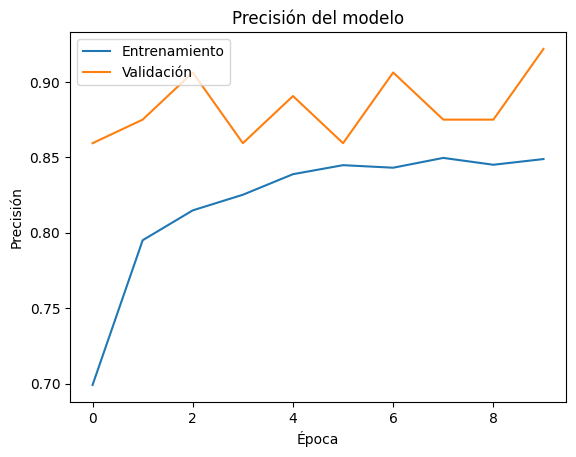

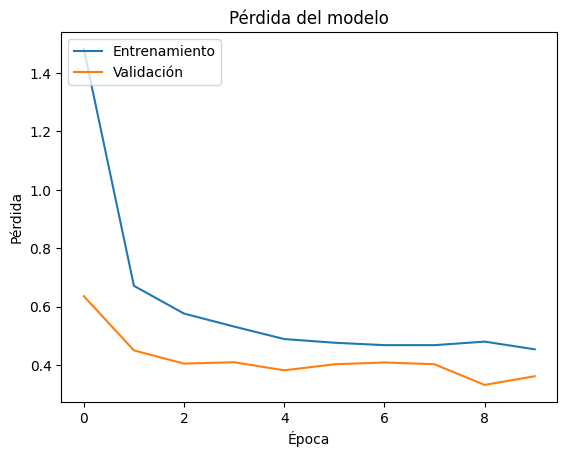

In [ ]:
# Evaluamos el modelo
loss, accuracy = model_RNNW2.evaluate(X_test_words, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Graficamos la precisión y la pérdida en el entrenamiento y la validación
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

In [ ]:
history.history

{'loss': [1.5000983476638794,
  0.7980728149414062,
  0.5891442894935608,
  0.5276692509651184,
  0.4931960701942444,
  0.47684845328330994,
  0.4679745137691498,
  0.4596897065639496,
  0.45519283413887024,
  0.4570906162261963],
 'accuracy': [0.7026788592338562,
  0.7332772016525269,
  0.8121190071105957,
  0.8207811713218689,
  0.8328921794891357,
  0.8368623852729797,
  0.8410731554031372,
  0.8433188796043396,
  0.8429579734802246,
  0.8449230194091797],
 'val_loss': [0.7408810257911682,
  0.5027010440826416,
  0.4302684962749481,
  0.37384217977523804,
  0.45651865005493164,
  0.3964969515800476,
  0.39437031745910645,
  0.36972135305404663,
  0.3369874954223633,
  0.3354223370552063],
 'val_accuracy': [0.796875,
  0.875,
  0.90625,
  0.90625,
  0.828125,
  0.890625,
  0.890625,
  0.9375,
  0.953125,
  0.9375]}

Si se prioriza la precisión general, la RNN + word2vec Embedding con una precisión de validación final del 93,75% es la ganadora.

Si se  prioriza un equilibrio entre Precisión, Sensibilidad y Puntuación F1, el SVC parece ser la mejor elección.

Guadardamos el modelo SVC para poder usarlo en el proximo notebook.

In [ ]:
from joblib import dump

# Guardar el modelo
dump(svc, 'drive/MyDrive/NLP/modelo_svc.joblib')

['drive/MyDrive/NLP/modelo_svc.joblib']